# Regresión Lineal SIMPLE

In [1]:
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72629  100 72629    0     0  63905      0  0:00:01  0:00:01 --:--:-- 64159


### Dataset de Consumo de combustible que contiene un rango de consumo y emisiones de CO2 para una nueva linea de vehiculos en venta en Canada

In [4]:
#Cargamos el dataset
df = pd.read_csv("FuelConsumptionCo2.csv")

# previsualizar
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionamos algunos campos para explorar

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(8)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255


ploteamos aca uno de los campos

array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

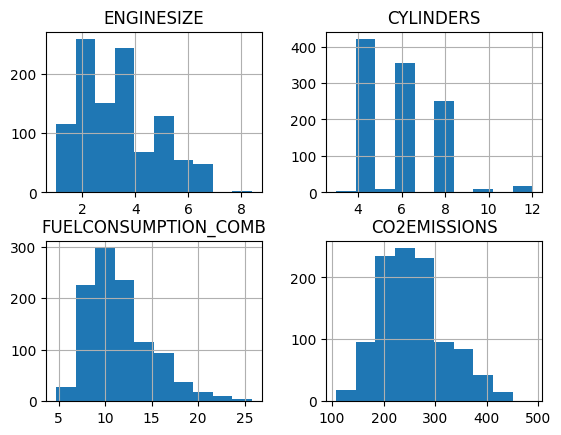

In [12]:
cdf.hist()

Ahora, tenemos que plotear cada uno de los campos respecto a la emisión

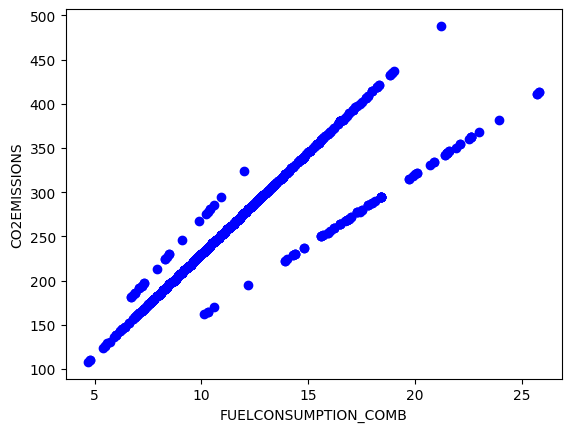

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

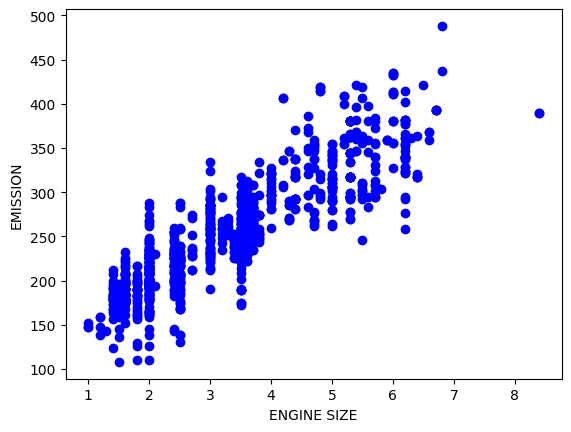

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("EMISSION")
plt.show()

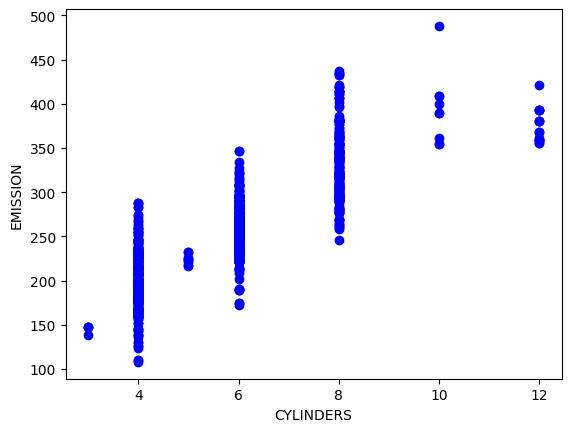

In [16]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSION")
plt.show()

## Creando un dataset de entrenamiento y prueba (Train&Test)

La división entrenamiento/prueba consiste en dividir el dataset en conjuntos de entrenamiento y de prueba que se excluyen mutuamente. Después, se entrena con el conjunto de entrenamiento y se prueba con el conjunto de prueba. Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se ha utilizado para entrenar el modelo. Por lo tanto, nos da una mejor comprensión de lo bien que nuestro modelo generaliza en nuevos datos.

Esto significa que conocemos el resultado de cada punto de datos en el conjunto de datos de prueba, ¡lo que lo hace ideal para realizar pruebas! Como estos datos no se han utilizado para entrenar el modelo, éste no conoce el resultado de esos puntos de datos. Así que, en esencia, se trata realmente de una prueba fuera de muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y de prueba. El 80% del conjunto de datos se utilizará para el entrenamiento y el 20% para las pruebas. Creamos una máscara para seleccionar filas aleatorias utilizando la función np.random.rand():

In [18]:
#Genera un arreglo de nº aleatorios entre 0 y 1, con la longitud del dataframe. Cada nº es comparado con 0.8
msk = np.random.rand(len(df)) < 0.8
#Selecciona las filas donde msk es True
train = cdf[msk]
#Selecciona las filas donde msk es False ~
test = cdf[~msk]

## Modelado

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
#Selecciona la columna enginesize y la comvirte en un arreglo Numpy
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
#Ajusta el modelo: train_x caracteristicas de entrada
#train_y Etiquetas o valores objetivo
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.9416249]]
Intercept:  [126.37069975]


Como se mencionó anteriormente, Coeficiente e Intercepto en la regresión lineal simple, son los parámetros de la recta de ajuste. Dado que se trata de una regresión lineal simple, con sólo 2 parámetros, y sabiendo que los parámetros son la intercepción y la pendiente de la recta, sklearn puede estimarlos directamente a partir de nuestros datos. Tenga en cuenta que todos los datos deben estar disponibles para recorrer y calcular los parámetros.

### Plot outputs

Text(0, 0.5, 'Emission')

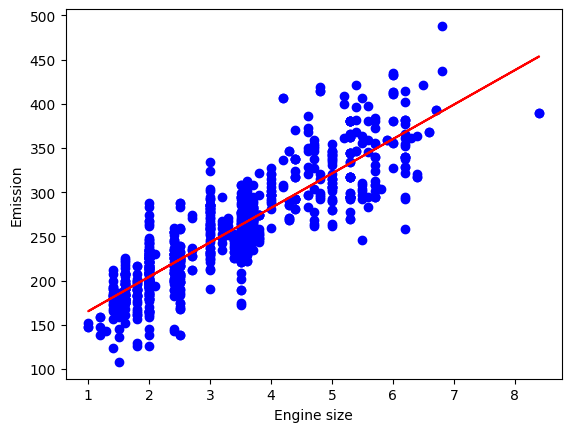

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación

Comparamos los valores reales y los valores predichos para calcular la precisión de un modelo de regresión. Las métricas de evaluación desempeñan un papel clave en el desarrollo de un modelo, ya que proporcionan información sobre las áreas que requieren mejoras.

Hay diferentes métricas de evaluación de modelos, vamos a utilizar MSE aquí para calcular la precisión de nuestro modelo basado en el conjunto de prueba:

Error Absoluto Medio: Es la media del valor absoluto de los errores. Es la métrica más fácil de entender, ya que se trata simplemente del error medio.

Error Cuadrático Medio (ECM): El Error Cuadrático Medio (ECM) es la media del error al cuadrado. Es más popular que el Error Medio Absoluto porque se centra más en los errores grandes. Esto se debe a que el término al cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.

Error cuadrático medio (RMSE).

R-cuadrado no es un error, sino más bien una métrica popular para medir el rendimiento de su modelo de regresión. Representa lo cerca que están los puntos de datos de la línea de regresión ajustada. Cuanto mayor sea el valor de R-cuadrado, mejor se ajustará el modelo a los datos. La mejor puntuación posible es 1,0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).

In [21]:
 from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.46
Residual sum of squares (MSE): 999.96
R2-score: 0.77
